In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir(r'C:\Post Graduate Course in Data Analytics\COVID-19 TIME SERIES PROJECT')

In [3]:
df=pd.read_csv('time_series_covid19_confirmed_US-1.csv')
df

,Date,Cases
0,1/22/20,1
1,1/23/20,1
2,1/24/20,2
3,1/25/20,2
4,1/26/20,5
...,...,...
606,9/19/21,42088171
607,9/20/21,42289819
608,9/21/21,42410607
609,9/22/21,42543510


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    611 non-null    object
 1   Cases   611 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.7+ KB


In [5]:
df.index=pd.DatetimeIndex(df['Date'])

In [6]:
df

,Date,Cases
Date,,
2020-01-22,1/22/20,1
2020-01-23,1/23/20,1
2020-01-24,1/24/20,2
2020-01-25,1/25/20,2
2020-01-26,1/26/20,5
...,...,...
2021-09-19,9/19/21,42088171
2021-09-20,9/20/21,42289819
2021-09-21,9/21/21,42410607


In [7]:
df.drop('Date',axis=1,inplace=True)

In [8]:
df

,Cases
Date,
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,2
2020-01-26,5
...,...
2021-09-19,42088171
2021-09-20,42289819
2021-09-21,42410607


Text(0.5, 1.0, 'COVID-19 Data for USA')

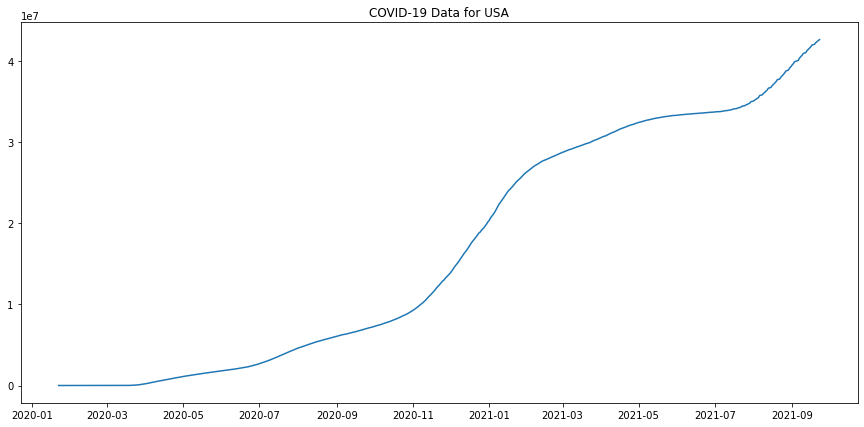

In [9]:
plt.rcParams['figure.figsize']=(15,7)
plt.plot(df)
plt.title('COVID-19 Data for USA')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 611 entries, 2020-01-22 to 2021-09-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Cases   611 non-null    int64
dtypes: int64(1)
memory usage: 9.5 KB


In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
adfuller(df)

(-0.26377648229347306,
 0.9304802892278566,
 16,
 594,
 {'1%': -3.441406876071572,
  '5%': -2.866418015869717,
  '10%': -2.5693678601956718},
 13312.742060552413)

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

Figure(1080x504)


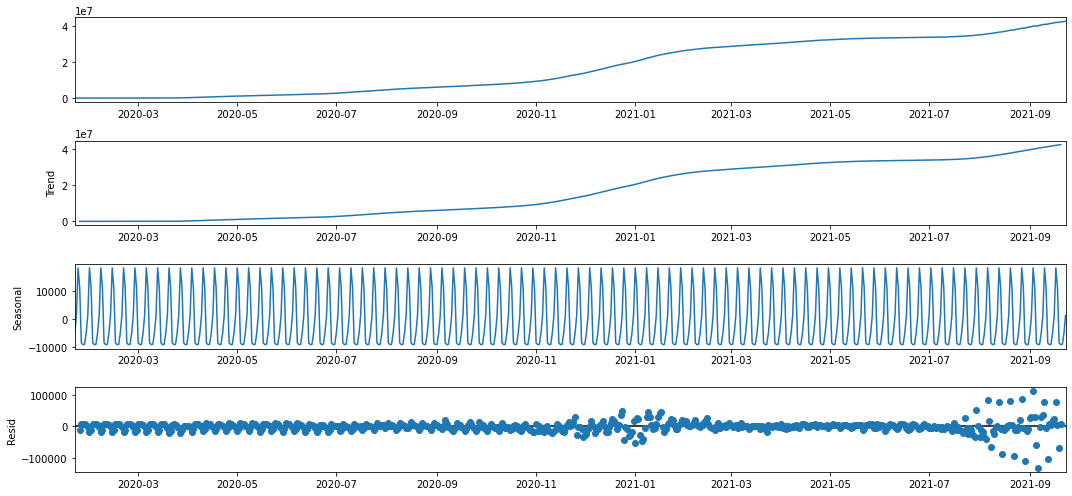

In [53]:
df_dec=seasonal_decompose(df)
print(df_dec.plot())

(array([  2.,   3.,   3.,   8.,  94., 451.,  32.,   5.,   5.,   2.]),
 array([-131176.04510417, -106912.44751376,  -82648.84992336,
         -58385.25233295,  -34121.65474254,   -9858.05715213,
          14405.54043827,   38669.13802868,   62932.73561909,
          87196.3332095 ,  111459.9307999 ]),
 <BarContainer object of 10 artists>)

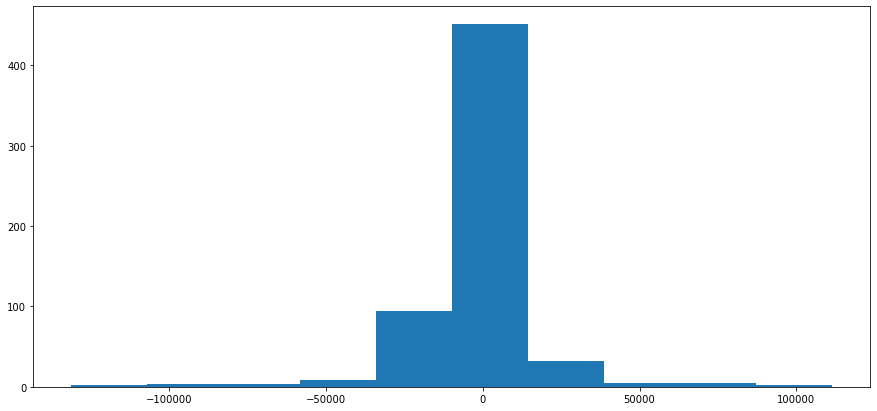

In [18]:
plt.hist(df_dec.resid)

In [19]:
df_dec_se=pow(df_dec.resid,2)
df_dec_mse=(df_dec_se.sum())/len(df_dec_se)
df_dec_rmse=np.sqrt(df_dec_mse)
df_dec_rmse

18263.092367833488

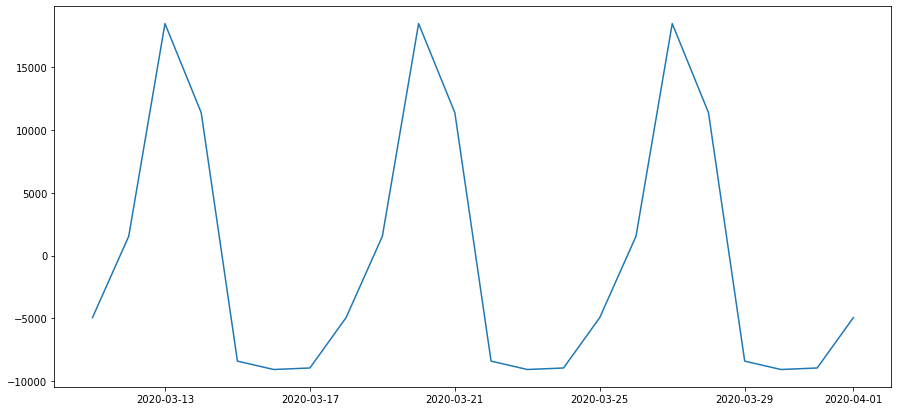

In [28]:
df_dec1=df_dec.seasonal.iloc[49:71]
plt.plot(df_dec1)

In [34]:
from statsmodels.tsa.holtwinters import Holt

In [35]:
holtmodel=Holt(df).fit()
holtmodel.summary()

C:\Users\soume\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\soume\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Cases,No. Observations:,611
Model:,Holt,SSE,511374095383.369
Optimized:,True,AIC,12561.160
Trend:,Additive,BIC,12578.821
Seasonal:,None,AICC,12561.299
Seasonal Periods:,None,Date:,"Sun, 26 Sep 2021"
Box-Cox:,False,Time:,23:43:01
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
smoothing_trend,0.2132143,beta,True


In [39]:
holtmodel_se=pow(holtmodel.resid,2)
holtmodel_mse=(holtmodel_se.sum())/len(holtmodel_se)
holtmodel_rmse=np.sqrt(holtmodel_mse)
holtmodel_rmse

28930.021539748173

(array([ 12.,   4.,  15., 100., 419.,  39.,   8.,   7.,   5.,   2.]),
 array([-119374.45211296,  -91212.46238201,  -63050.47265106,
         -34888.48292012,   -6726.49318917,   21435.49654178,
          49597.48627272,   77759.47600367,  105921.46573462,
         134083.45546556,  162245.44519651]),
 <BarContainer object of 10 artists>)

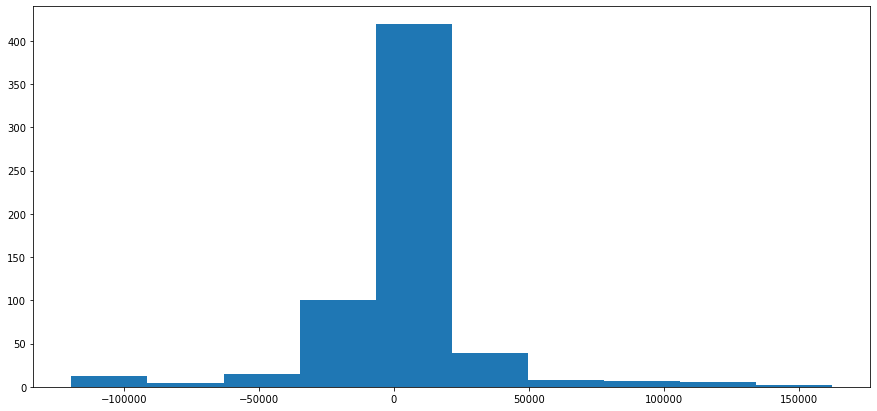

In [40]:
plt.hist(holtmodel.resid)

In [55]:
fore=holtmodel.forecast(180)
fore

2021-09-24    4.280146e+07
2021-09-25    4.293376e+07
2021-09-26    4.306606e+07
2021-09-27    4.319836e+07
2021-09-28    4.333067e+07
                  ...     
2022-03-18    6.595428e+07
2022-03-19    6.608658e+07
2022-03-20    6.621888e+07
2022-03-21    6.635119e+07
2022-03-22    6.648349e+07
Freq: D, Length: 180, dtype: float64

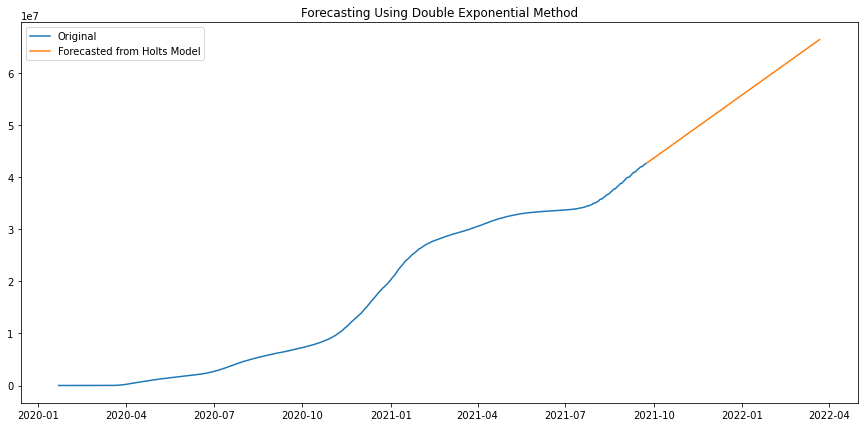

In [56]:
plt.plot(df)
plt.plot(fore)
plt.legend(['Original','Forecasted from Holts Model'],loc='best')
plt.title('Forecasting Using Double Exponential Method')
plt.show()

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [57]:
df_es=ExponentialSmoothing(df,seasonal_periods=7,seasonal='add').fit()
df_es.summary()

C:\Users\soume\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\soume\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Cases,No. Observations:,611
Model:,ExponentialSmoothing,SSE,5797706938277.811
Optimized:,True,AIC,14054.739
Trend:,None,BIC,14094.475
Seasonal:,Additive,AICC,14055.180
Seasonal Periods:,7,Date:,"Sun, 26 Sep 2021"
Box-Cox:,False,Time:,23:56:46
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
smoothing_seasonal,0.0050000,gamma,True


In [58]:
df_es_pred=df_es.forecast(180)
df_es_pred

2021-09-24    4.267317e+07
2021-09-25    4.266375e+07
2021-09-26    4.265857e+07
2021-09-27    4.266585e+07
2021-09-28    4.266619e+07
                  ...     
2022-03-18    4.267317e+07
2022-03-19    4.266375e+07
2022-03-20    4.265857e+07
2022-03-21    4.266585e+07
2022-03-22    4.266619e+07
Freq: D, Length: 180, dtype: float64

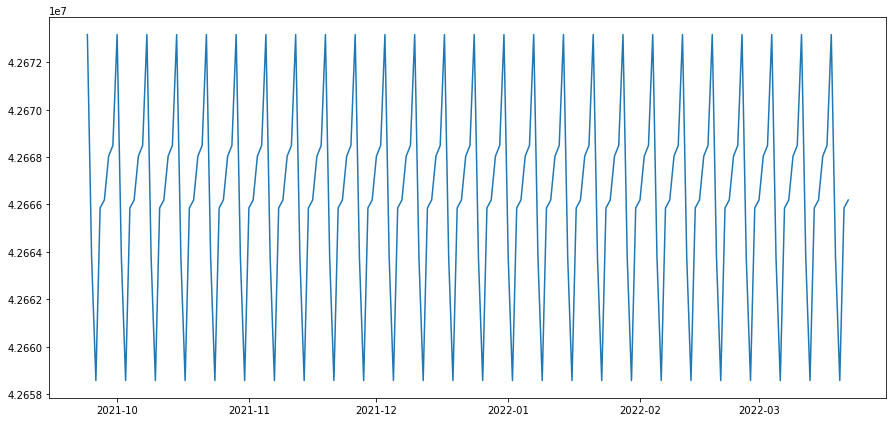

In [59]:
plt.plot(df_es_pred)

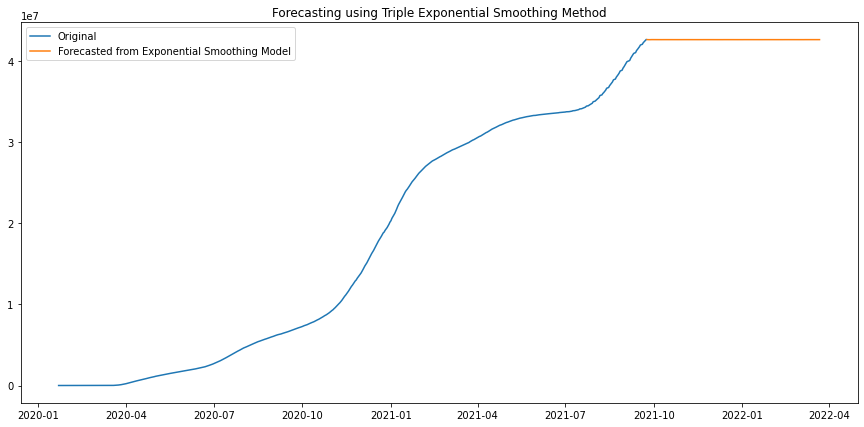

In [60]:
plt.plot(df)
plt.plot(df_es_pred)
plt.legend(['Original','Forecasted from Exponential Smoothing Model'],loc='best')
plt.title('Forecasting using Triple Exponential Smoothing Method')
plt.show()

In [61]:
df_es_se=pow(df_es.resid,2)
df_es_mse=(df_es_se.sum())/len(df_es_se)
df_es_rmse=np.sqrt(df_es_mse)
df_es_rmse

97410.89291950097

(array([201., 180.,  86.,  23.,  23.,  32.,  28.,  26.,   8.,   4.]),
 array([-2.99997500e+00,  3.04127451e+04,  6.08284901e+04,  9.12442352e+04,
         1.21659980e+05,  1.52075725e+05,  1.82491470e+05,  2.12907215e+05,
         2.43322961e+05,  2.73738706e+05,  3.04154451e+05]),
 <BarContainer object of 10 artists>)

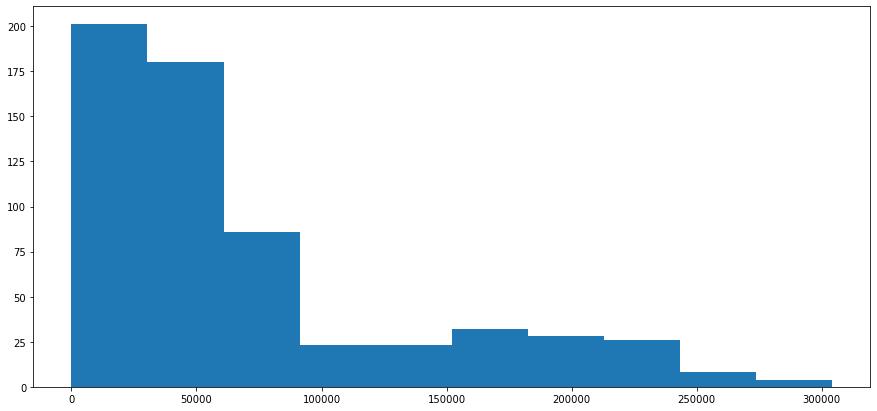

In [62]:
plt.hist(df_es.resid)

In [63]:
from pmdarima import auto_arima

In [64]:
df_mod=auto_arima(df)
df_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  611
Model:               SARIMAX(2, 2, 1)   Log Likelihood               -7104.152
Date:                Mon, 27 Sep 2021   AIC                          14216.303
Time:                        00:08:39   BIC                          14233.950
Sample:                             0   HQIC                         14223.168
                                - 611                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0515      0.029     -1.753      0.080      -0.109       0.006
ar.L2         -0.2715      0.025    -10.882      0.000      -0.320      -0.223
ma.L1         -0.7077      0.027    -26.441      0.000      -0.760      -0.655
sigma2      8.686e+08   4.37e-12   1.99e+20      0.000    8.69e+08    8.69e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1587.47
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              67.81   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.9e+35. Standard errors may be unstable.
"""

In [69]:
df_mod_se=pow(df_mod.resid(),2)
df_mod_mse=(df_mod_se.sum())/len(df_mod_se)
df_mod_rmse=np.sqrt(df_mod_mse)
df_mod_rmse

28065.834385525726

In [68]:
df_mod.resid()

array([ 1.00000000e+00, -6.28968390e-01,  9.13418603e-01, -6.60721681e-01,
        2.78208118e+00, -1.20882330e+00, -1.82594196e-01,  5.74013817e-02,
       -9.08038483e-01,  1.57854933e+00, -1.05237681e+00, -3.04500303e-01,
        2.24165276e+00, -1.25928674e+00, -2.31270830e-01,  2.19803231e-02,
       -9.32953044e-01, -4.40290097e-01, -5.83044938e-01, -4.12622390e-01,
        7.07985809e-01, -4.47464307e-01,  9.03287316e-01, -5.80699607e-01,
       -1.91003873e-01, -4.06625270e-01,  7.12229725e-01,  5.55539361e-01,
       -3.35391550e-01, -2.88849527e-01, -4.75871022e-01, -3.36775767e-01,
       -2.38337515e-01,  8.31327617e-01,  6.39825404e-01,  7.24258011e-01,
       -4.87439799e-01, -3.96454663e-01,  6.44797641e+00,  1.09236993e+01,
        1.49398517e+01,  1.64591557e+01,  2.52114302e+01,  5.65459308e+01,
        3.71803777e+01,  1.42944455e+02,  5.55003400e+01,  3.57999829e+01,
        8.64899342e+01,  2.48979093e+02,  2.87720144e+02,  4.45910093e+02,
        4.51137282e+02, -

(array([  8.,   7.,   9.,  77., 436.,  44.,  17.,   7.,   4.,   2.]),
 array([-124658.03748915,  -96180.2186059 ,  -67702.39972265,
         -39224.5808394 ,  -10746.76195615,   17731.0569271 ,
          46208.87581035,   74686.69469361,  103164.51357686,
         131642.33246011,  160120.15134336]),
 <BarContainer object of 10 artists>)

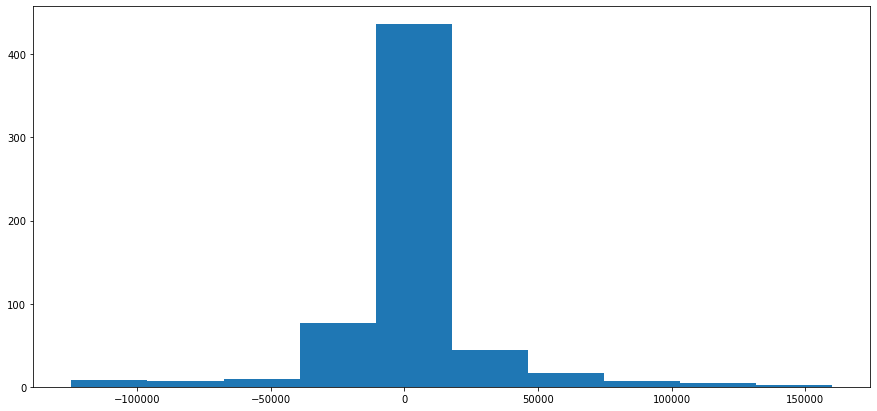

In [71]:
df_mod_res=df_mod.resid()
plt.hist(df_mod_res)

In [72]:
df_pred=df_mod.predict(n_periods=180)
df_pred

array([42799194.91503334, 42931026.62795037, 43061552.92595574,
       43191671.18590112, 43322164.81269486, 43452749.87361584,
       43583228.33270354, 43713687.46099941, 43844176.52185337,
       43974669.28879575, 44105153.73968001, 44235637.61274987,
       44366123.77297541, 44496609.97227993, 44627095.5487213 ,
       44757581.14662687, 44888066.91250411, 45018552.66390572,
       45149038.37045662, 45279524.08324637, 45410009.80788966,
       45540495.53022903, 45670981.24946939, 45801466.96949472,
       45931952.69032086, 46062438.41089269, 46192924.13126023,
       46323409.85170732, 46453895.57220577, 46584381.29267999,
       46714867.01314151, 46845352.73361026, 46975838.45408208,
       47106324.17455178, 47236809.89502077, 47367295.61549035,
       47497781.33596011, 47628267.0564297 , 47758752.77689924,
       47889238.49736884, 48019724.21783844, 48150209.93830803,
       48280695.65877762, 48411181.37924721, 48541667.0997168 ,
       48672152.8201864 , 48802638.54065

In [73]:
df_pred=pd.DataFrame(df_pred,index=pd.date_range(start='2021-09-24',periods=180,freq='D'))
df_pred

,0
2021-09-24,4.279919e+07
2021-09-25,4.293103e+07
2021-09-26,4.306155e+07
2021-09-27,4.319167e+07
2021-09-28,4.332216e+07
...,...
2022-03-18,6.563530e+07
2022-03-19,6.576578e+07
2022-03-20,6.589627e+07
2022-03-21,6.602675e+07


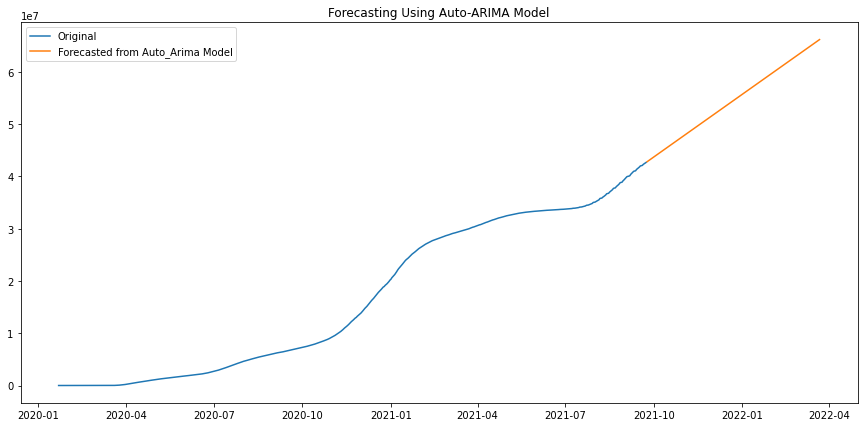

In [74]:
plt.plot(df)
plt.plot(df_pred)
plt.legend(['Original','Forecasted from Auto_Arima Model'])
plt.title('Forecasting Using Auto-ARIMA Model')
plt.show()